# Práctica entregable - <span style='background :yellow' >LAB1</span>

La siguiente práctica se entregará a través del aula virtual. 

La práctica está centrada en el análisis en el dominio de la frecuencia de las señales. Tiene ejercicios parecidos a los que estamos realizando en clase y que implican implementar conceptos vistos en teoría. 

Instrucciones
* Podeis usar/consultar la teoría para realizar los ejercicios
* **Podéis implementar vuestras funciones o emplear las que ya tiene Sympy o Numpy** para el desarrollo de las series y/o transformadas
* Podéis usar los manuales de usuario (sympy, numpy) proporcionados para la práctica
* No podéis emplear los Notebooks de las prácticas anteriores
* No podéis usar Internet 
* Los ejercicios tienen que tener todo el código necesario para llegar a la solución

Subida de los resultados
* Al terminar la práctica, la tenéis que subir al aula virtual 
* Solo es necesario subir el Notebook 
* Fijaos en que estéis subiendo el Notebook modificado y no el original descargado
    * Podéis fijaros en que el tamaño que ocupa sea diferente para estar seguros de que es el vuestro


## Funciones disponibles


Las siguientes funciones las dejo disponibles pero no tenéis que emplearlas Podéis emplear propias vuestras implementaciones o las de Python


In [1]:
#Librerías necesarias para el desarrollo
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
from IPython.display import display
plt.rcParams["figure.figsize"] = (14,4) #dimensiones por defecto al plotear (width, height)

In [2]:
#Este es un método de visualización muy básico para hacer pruebas
def plot_stem( t , y, y_lim=None, view_baseline=True, title=None):
    """Función que configura y visualiza un gráfico stem 

       Parámetros:
       t -- muestras de tiempo
       y -- secuencia para visualizar
       y_lim -- tupla de la forma (min, max) que establece los límites en el eje de ordenadas. Por defecto None
       view_baseline -- Establece una línea horizontal en el eje de las x a la altura de  y=0 . Por defecto False

    """
    markerline, stemlines, baseline = plt.stem(t, y)
    plt.setp(baseline, visible=view_baseline, color="black")
    plt.setp(markerline, color="crimson",markersize = 10)
    plt.setp(stemlines, color="crimson", linewidth = 4)
    plt.axvline(x=0, linewidth=1,color="black")
    plt.ylim(y_lim)
    if title is not None:
        plt.title(title)
    plt.show()

In [3]:
def get_frequencies(X, freq,elements):
        """Función que devuelve los valores y las frecuencias positivas asociadas a los 'n' valores máximos del espectro

       Parámetros:
       
       X: array con los resultados de la DFT
       freq: array con las frecuencias asociadas a la DFT
       elements -- número de picos máximos a buscar 
       

        """
        X_modules=abs(X.copy())
        #argsort devuelve una lista ordenada con los índices con los valores máximos
        #al negarlo consigo darle la vuelta al orden y me es más fácil recuperar lo que 
        #me interesa. 
        idx=  (-X_modules).argsort()
        #Creo un array que solo tiene las frecuencias positivas ordenadas y devuelvo los
        # "elements" que me piden
        return [ (round(X_modules[i],3), round(freq[i],3)) for i in idx if freq[i]>0][:elements] 

In [4]:
def plot_sympy(signals, limits, title=None, xlabel=None, ylabel=None ):
    '''
        Función para plotear diferentes funciones cada una con un color diferente (max.7)
        Parámetros:
        
        signals: lista con las funciones. Tiene que recibir siempre una lista aunque solo tenga 1 elemento
        limits: tripla de sympy con la forma (sym, start, end)
        title: cadena de texto con el título del gráfico
        xlabel: cadena de texto con el título del eje X del gráfico
        ylabel: cadena de texto con el título del eje Y del gráfico
    '''
    
    colors=["black","blue", "red", "green", "yellow", "pink", "cyan"]
   
    p=sp.plot(*signals,limits, show=False, legend=False, title=title, xlabel=xlabel, ylabel=ylabel)
    for i in range(len(signals)):
        p[i].line_color=colors[i]
  
    
    p.show()
    
    

### Información sobre los números complejos
$z=a+bj$

$z=re^{j\theta}$

$r=\sqrt{a^2 + b^2}$

$\theta= arctan(\frac{b}{a})$

$z=\frac{a+bj}{c+dj}, \theta(z)= arctan(\frac{b}{a})-arctan(\frac{d}{c})$


$|\frac{z_1}{z_2}|=\frac{|z_1|}{|z_2|}$


### Lista de funciones que pueden ser útiles
No necesariamente tenéis que usarlas todas. Es un recordatorio de algunas de las funciones vistas en clase

* abs()
* numpy.fft.fft()
* numpy.fft.ifft()
* numpy.fft.fftfreq()
* numpy.fft.fftshift()
* numpy.fft.ifftshift()
* numpy.sqrt()
* numpy.arctan()


* sympy.fourier_series()
* sympy.plot()
* sympy.N()
* sympy.I
* sympy.exp()
* sympy.integrate()
* sympy.sqrt()
* sympy.fourier_transform()
* sympy.sympify()
* sympy.symbols()
* sympy.Abs()

## Ejercicios

### <span style='background :yellow' >Ejercicio 1</span>

Para la señal triangular que aparece en la imagen: 


![imagen](triangle_wave.png)

* Crea la función que genera la señal triangular
* Desarrolla la serie de Fourier
* Obtén 5, 10 y 30 armónicos y visualízalos en el intervalo -10,10



**Nota**: Podéis realizar este ejercicio empleando las funciones de Sympy o implementar vuestras funciones para trabajar con exponenciales complejas como vimos en teoría. En prácticas vimos las 2 opciones. No valoraré una opción más que la otra.


### Ejercicio 1 - Alternativa B (-50% nota)

Si no os sale la función para generar la señal triangular podés usar la siguiente función básica:

<code>
def f_base(t):
   return t
</code>


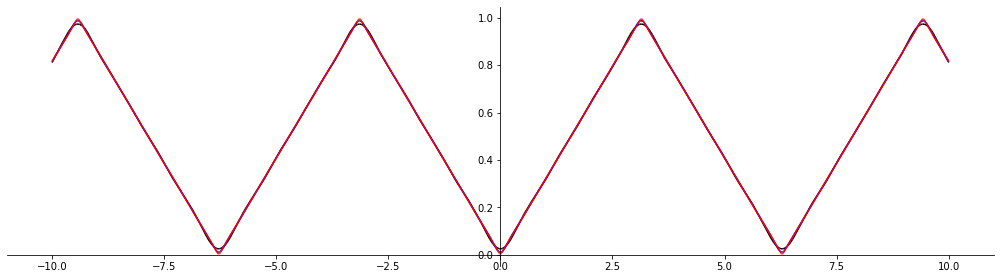

In [7]:
def triang(t):
    return abs(t/np.pi)
t = sp.symbols("t",nonzero=True)
limits = (t,-np.pi,np.pi)
fs = sp.fourier_series(triang(t),limits)
s1=fs.truncate(n=5)
s2=fs.truncate(n=10)
s3=fs.truncate(n=30)
plot_sympy([s1,s2,s3],(t,-10,10))

### <span style='background :yellow' >Ejercicio 2</span>
 Para la señal periódica de diente de sierra (valores -1 y 1) que se muestra en la imagen
 
![iamgen](rampa.png)

* Crea la función que genera la señal de diente de sierra
* Desarrolla la serie de Fourier
* Obtén el espectro de módulo ($|c_n|$, ej. 10 armónicos)
* Obtén el espectro de densidad de potencia (ej. 10 armónicos)





**Nota**: Podéis realizar este ejercicio empleando los coeficientes de la serie obtenidos a través de Sympy o implementar vuestras funciones como hicimos en prácticas. 

**Nota2**: Si usais los resultados de Sympy, recordad que obtendreis valores de $a_n$ y $b_n$  y que es necesario modificarlos para poder operar con ellos 


### Ejercicio 2 - Alternativa B (-25% nota)

Si no os sale la función para generar la señal de diente de sierra (valores -1 y 1) podés usar la siguiente función básica:

<code>
def f_base(t):
   return t
</code>  


In [20]:
def sierra(t):
    return (t/np.pi)
limits = (t,-sp.pi,sp.pi)
fs = sp.fourier_series(sierra(t),limits)
s=fs.truncate(n=10)
a = fs.an
b = fs.bn
display(s)
display(a)
display(b[9])
b10=-0.2/np.pi
emod = abs(b10)
efas = emod**2
display(emod)
display(efas)
print(b[10].subs(t,sp.pi/2))

0.636619772367581*sin(t) - 0.318309886183791*sin(2*t) + 0.212206590789194*sin(3*t) - 0.159154943091895*sin(4*t) + 0.127323954473516*sin(5*t) - 0.106103295394597*sin(6*t) + 0.0909456817667973*sin(7*t) - 0.0795774715459477*sin(8*t) + 0.0707355302630646*sin(9*t) - 0.0636619772367581*sin(10*t)

SeqFormula(0, (_k, 1, oo))

-0.0636619772367581*sin(10*t)

0.06366197723675814

0.004052847345693511

-0.0578745247606892


#### <span style='background :yellow' >Ejercicio 3</span>


Desarrolla la transformada de Fourier de la siguiente señal aperiódica (decaimiento exponencial por los dos lados)

$\Large x(t)=e^{-4|t|}$


* Valida la relación de Parseval
    * Calcula la energía en el dominio del tiempo y de la frecuencia
* Calcula y visualiza el espectro de módulo en el intervalo (-4,4)
* Calcula y visualiza el espectro de fase en el intervalo (-4,4)


**Importante:** Si no es posible calcular/visualizar algún espectro o tiene alguna característica que lo dificulte podéis usar un <code> print</code> con la explicación que querais dar.








1/4

1/4

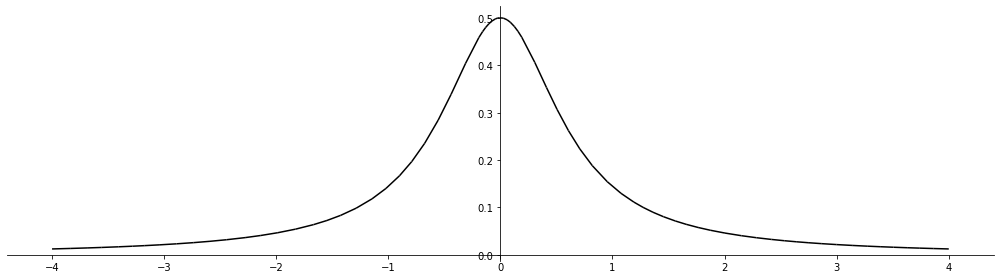

2/(pi**2*F**2 + 4)

La transformada de fourier no tiene parte imaginaria, como se muestra en el display, esto implica que el espectro de fase da siempre 0 (se obtiene calculando el arcotangente de la parte imaginaria entre la real)


In [9]:
def dex(t):
    return sp.exp(-4*abs(t))

def Pt(t):
    return sp.integrate(abs(dex(t))**2,(t,-sp.oo,sp.oo))

def PF(ff):
    ffs = sp.sympify(ff)
    return sp.integrate(abs(ffs)**2,(F,-sp.oo,sp.oo))

F = sp.symbols("F",nonzero=True)
display(Pt(t))
tf=((sp.fourier_transform(dex(t),t,F)))
display(PF(tf))

plot_sympy([abs(tf)],(F,-4,4))
display(tf)
print("La transformada de fourier no tiene parte imaginaria, como se muestra en el display, esto implica que el \
espectro de fase da siempre 0 (se obtiene calculando el arcotangente de la parte imaginaria entre la real)")

### <span style='background :yellow' >Ejercicio 4</span>

Dada la siguiente señal

$x[n]=\{1,2,3,4,5\}$

* Calcula (si es posible y tiene sentido) la DFT de $x[n]$ para N=3, N=5 y N=25   
    * Para cada uno de los valores de N (si es posible y tiene sentido)
        * Calcula y visualiza el espectro de módulo
            * El eje de las x tiene que estar formado por las frecuencias
        * Calcula y visualiza el espectro de fase
            * El eje de las x tiene que estar formado por las frecuencias

**Nota** Para visualizar podéis usar plt.stem o la función plot_stem definida al inicio


**Importante:** Si no es posible o no tiene sentido algún cálculo debeis de usar un <code> print</code> con la explicación oportuna



No tiene sentido calcular la dft con valores de n más pequeños de la longitud de x, ya que estariamos 'capando' la señal ya que no calculamos con todos los valores de la señal


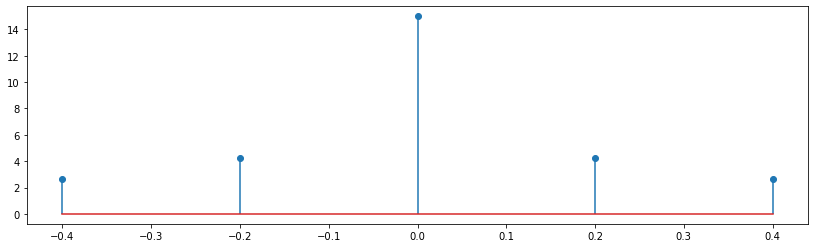

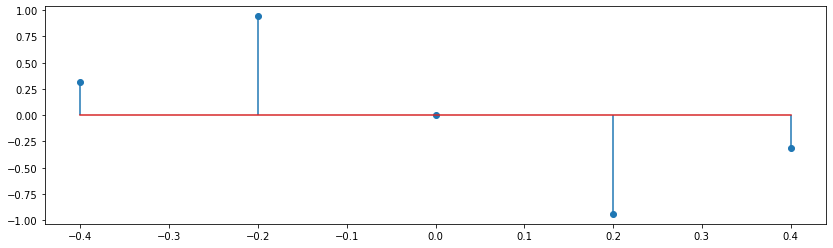

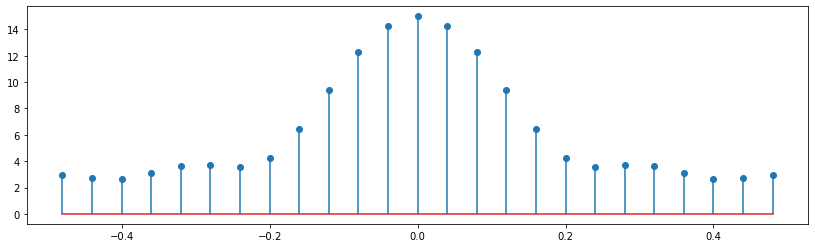

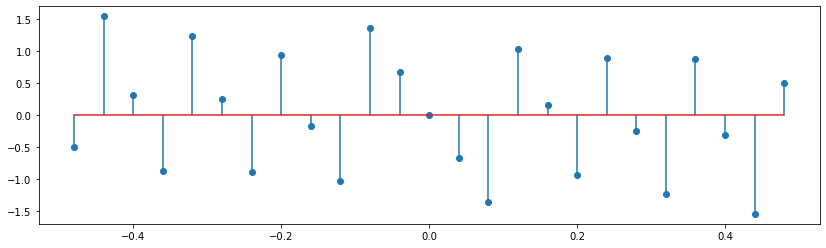

In [8]:
x = np.arange(1,6)
print("No tiene sentido calcular la dft con valores de n más pequeños de la longitud de x, ya que estariamos \
'capando' la señal ya que no calculamos con todos los valores de la señal")

dft2 = np.fft.fft(x,5)
dft2_frq = np.fft.fftfreq(len(dft2))
plt.stem(dft2_frq,abs(dft2))
plt.show()
fase2 = np.arctan(dft2.imag/dft2.real)
plt.stem(dft2_frq,fase2)
plt.show()


dft3 = np.fft.fft(x,25)
dft3_frq = np.fft.fftfreq(len(dft3))
plt.stem(dft3_frq,abs(dft3))
plt.show()
fase3 = np.arctan(dft3.imag/dft3.real)
plt.stem(dft3_frq,fase3)
plt.show()



### <span style='background :yellow' >Ejercicio 5</span>
El fichero *signal.csv* contiene datos de una señal compuesta por diferentes señales sinusoidales y ruído. 

$signal=signal_1+signal_2 +...+signal_n+noise$

Los datos del fichero representan la señal resultante muestreada **cada 0.25 segundos**. Analiza los datos del fichero para:

* Encontrar el número de señales sinusoidales que conforman la señal resultante
* Imprimir la frecuencia y el período de las señales sinusoidales originales

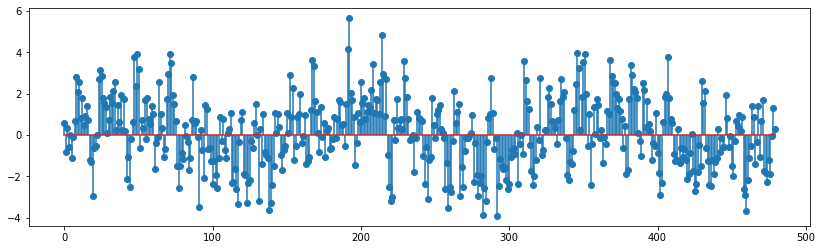

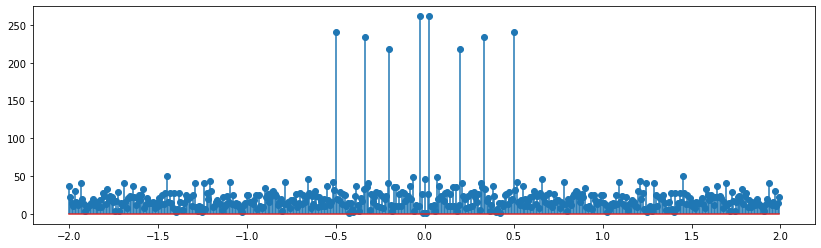

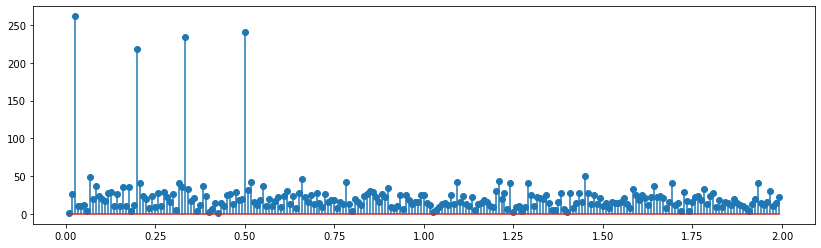

Tenemos 4 señales:
Frecuencia = 0.025
Periodo = 40.0

Frecuencia = 0.5
Periodo = 2.0

Frecuencia = 0.333
Periodo = 3.003003003003003

Frecuencia = 0.2
Periodo = 5.0



In [9]:
#Cargamos la señal
signal=np.loadtxt('signal.csv', delimiter=',')
plt.stem(signal)
plt.show()

f = 1/4
dfts = np.fft.fft(signal)
dfts_frq = np.fft.fftfreq(len(dfts),d=f)

plt.stem(dfts_frq,abs(dfts))
plt.show()

ix = dfts_frq>0
plt.stem(dfts_frq[ix],abs(dfts[ix]))
plt.show()
print("Tenemos 4 señales:")

frec= get_frequencies(dfts[ix],dfts_frq[ix],4)
for i in frec:
    print("Frecuencia =",i[1])
    print("Periodo =",1/i[1])
    print("")